# VHR example
Let's use EOReader with Very High Resolution data.

## Imports

In [1]:
import os
import logging

# EOReader
from eoreader.reader import Reader
from eoreader.bands import GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE, to_str
from eoreader.env_vars import DEM_PATH

## Create the logger

In [2]:
# Create logger

logger = logging.getLogger("eoreader")
logger.setLevel(logging.INFO)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

# create formatter
formatter = logging.Formatter('%(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

# Open the VHR product

Please be aware that EOReader will always work in UTM projection.  
So if you give WGS84 data, EOReader will reproject the stacks and this can be time-consuming

In [3]:
# Set a DEM
os.environ[DEM_PATH] = os.path.join(
    "/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL",
    "MERIT_Hydrologically_Adjusted_Elevations", "MERIT_DEM.vrt"
)

# Open your product
path = os.path.join("/home", "data", "DATA", "PRODS", "PLEIADES", "5547047101", "IMG_PHR1A_PMS_001")
reader = Reader()
prod = reader.open(path, remove_tmp=True)
prod

In [ ]:
# Plot the quicklook
prod.plot()

In [ ]:
# Get the bands information
prod.bands

In [4]:
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

Acquisition datetime: 2020-05-11 02:31:58
Condensed name: 20200511T023158_PLD_ORT_PMS


<AxesSubplot:>

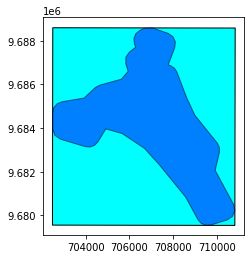

In [6]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

Here, if you want to orthorectify or pansharpen your data manually, you can set your stack here.

If you do not provide this stack, but you give a non-orthorectified product to EOReader
(i.e. `SEN` or `PRJ` products for Pleiades), you must provide a DEM to orthorectify correctly the data.

```python
prod.ortho_stack = "/path/to/ortho_stack.tif"
```

## Load some bands

In [8]:
# Select the bands you want to load
bands = [GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE]

# Be sure they exist for Pleiades sensor
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # Pleiades doesn't provide TIR and SHADOWS bands

['GREEN', 'NDVI', 'CLOUDS', 'HILLSHADE']


In [9]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

Reprojecting band NIR to UTM with a 0.5 m resolution.
Reprojecting band GREEN to UTM with a 0.5 m resolution.
Reprojecting band RED to UTM with a 0.5 m resolution.


<xarray.DataArray 'GREEN' (band: 1, y: 18124, x: 16754)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.108e+05 7.108e+05
  * y            (y) float64 9.689e+06 9.689e+06 9.689e+06 ... 9.68e+06 9.68e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         GREEN
    sensor:            Pleiades
    sensor_id:         PLD
    product_path:      /home/data/DATA/PRODS/PLEIADES/5547047101/IMG_PHR1A_PM...
    product_name:      PHR1A_PMS_202005110231585_ORT_5547047101
    product_filename:  IMG_PHR1A_PMS_001
    product_type:      Ortho Single Image
    acquisition_date:  20200511T023158
    condensed_name:    20200511T023158_PLD_ORT_PMS

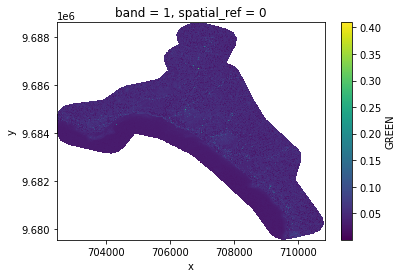

In [10]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

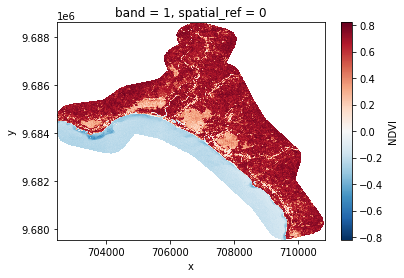

In [11]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

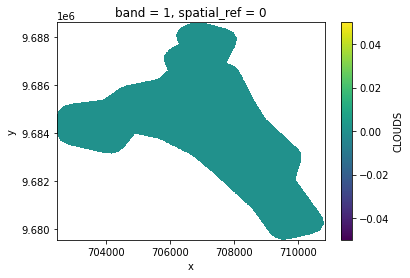

In [12]:
# Plot a subsampled version
band_dict[CLOUDS][:, ::10, ::10].plot()

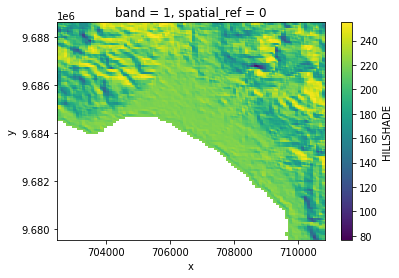

In [13]:
# Plot a subsampled version
band_dict[HILLSHADE][:, ::10, ::10].plot()

## Stack some bands

In [14]:
# You can also stack those bands
stack = prod.stack(ok_bands)

<xarray.DataArray 'GREEN NDVI CLOUDS HILLSHADE' (z: 4, y: 18124, x: 16754)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[203.14804, 203.09644, 203.04478, ..., 192.94646, 193.02295,
         193.11148],
        [203.2448 , 203.1972 , 203.14554, ..., 192.77391, 192.85446,
         192.9325 ],
        [203.34145, 203.29594, 203.25027, ..., 192.6033 , 192.6816 ,
         192.76187],
        ...,
        [      nan,       nan,       nan, ..., 174.02263, 173.97194,
         173.9212 ],
        [      nan,       nan,       nan, ..., 176.22513, 176.15732,
         176.08734],
        [      nan,       nan,       nan, ..., 177.34239, 177.27248,
         177.19945]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.108e+05 7.108e+05
  * y            (y) float64 9.689e+06 9.689e+06 9.689e+06 ... 9.68e+06 9.68e+06
  * z            (z) MultiIndex
  - variable     (z) object 'GREEN' 'NDVI' 'CLOUDS' 'HILLSHADE'
  - band         (z) int64 1 1 1 1
Attributes:
    long_name:         GREEN NDVI CLOUDS HILLSHADE
    sensor:            Pleiades
    sensor_id:         PLD
    product_path:      /home/data/DATA/PRODS/PLEIADES/5547047101/IMG_PHR1A_PM...
    product_name:      PHR1A_PMS_202005110231585_ORT_5547047101
    product_filename:  IMG_PHR1A_PMS_001
    product_type:      Ortho Single Image
    acquisition_date:  20200511T023158
    condensed_name:    20200511T023158_PLD_ORT_PMS

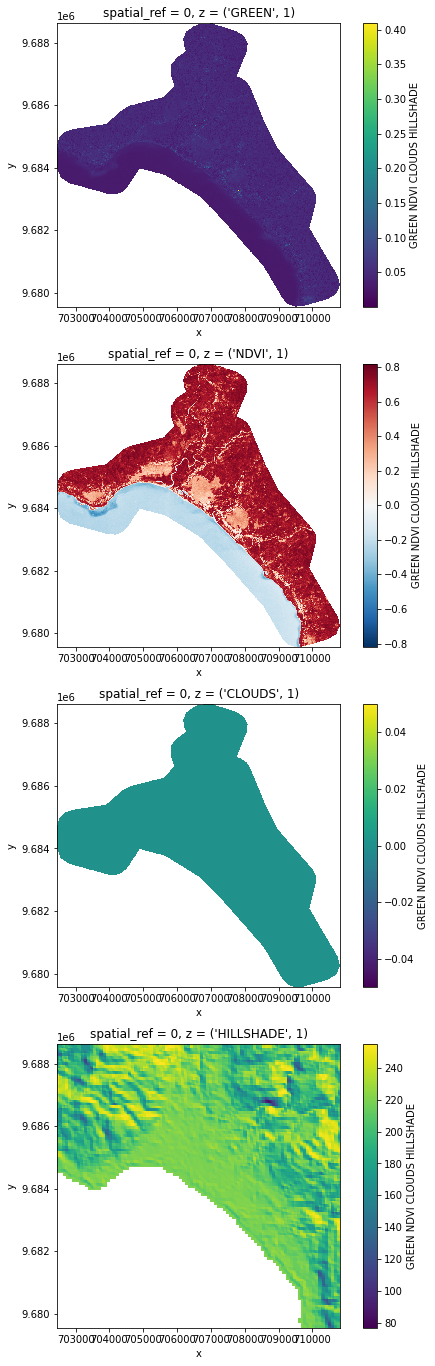

In [15]:
# Plot a subsampled version
import matplotlib.pyplot as plt

nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})

for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])